## DATA 601 Project-1
### Deadline: April 8, 2024, 23:59pm

### Instructions
The input_data folder has various csv files related to MD crash data, weather data, total drivers by state and state names.

- MD_Crash_report files are vehicle crash report data obtained from for https://opendata.maryland.gov. These include four data tables on accident crash reports, driver (person) data, emergency medical services (EMS) data, and vehicle data. All tables have a common ID feature called "Report Number". The data includes the following years and quarters:
    - [CY2017Q1](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/9886-wded) 
    - [CY2017Q2](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/wnvu-hisq)
    - [CY2017Q3](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/m6zc-qj6d)
    - [CY2017Q4](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/9tum-d4as)
- States_drivers.csv includes data on total drivers by state.
- States.json includes the state name and abbreviations in case it is needed.

Other documentation:
- Sample __State of Maryland Vehicle Accident Report__ is included in the file "maryland_accident_report.pdf" (source: https://www.nhtsa.gov/sites/nhtsa.gov/files/documents/maryland_0.pdf). This report has several codes that can be used to explain codes in the data.
- The __Maryland Cross Reference Document__ is included in the file "maryland_cross_reference_document.pdf" (source: https://www.nhtsa.gov/sites/nhtsa.gov/files/documents/maryland_cross_reference.pdf). This document may also provide some more details in the codes in the data.
- The __maryland county codes__ is included in the file "MD_County_Codes.pdf" (source: https://mde.maryland.gov/programs/Land/Documents/LeadFactSheets/LeadfsCountyCodes.pdf)

<br>
Document any assumptions that you do as part of a comment or a markdown cell were appropriate. Note that you may change the format of the project as long as the questions are answered.

### Question 1 (15 points)

Review the questions below to familiarize yourself with the task. After reviewing the questions review the data files of the MD_Crash_Reports of the project and determine if it is worth merging/concatenation/joining and document your reasoning on merging or not merging the crash datafiles that will be used. Question 1 and 2 may be combined for purposes of organizing the Project 1 Jupyter Notebook.

In [ ]:
# Each accident may be involved in more than one vehicle and one person

In [278]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import re
import seaborn as sns
from math import radians, sin, cos, acos

In [2]:
df_report = pd.read_excel("MD_Crash_Data_2017.xlsx") # pd.read_excel("MD_Crash_Data_2017.xlsx"),parse_dates=[['Date', 'Time']])
df_vehicle = pd.read_csv('MD_Crash_Vehicle_Data_2017.csv')
df_ems = pd.read_excel("MD_Crash_EMS_Data_2017.xlsx")
df_person = pd.read_excel("MD_Crash_Person_Data_2017.xlsx")
df_pid = pd.read_excel("MD_Crash_Person_ID_Data_2017.xlsx")
df_state_driver = pd.read_csv('states_drivers.csv')

In [500]:
df_report = pd.read_excel("MD_Crash_Data_2017.xlsx")

In [501]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113192 entries, 0 to 113191
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   LIGHT_CODE           113192 non-null  float64       
 1   COUNTY_NO            113192 non-null  int64         
 2   MUNI_CODE            91866 non-null   float64       
 3   JUNCTION_CODE        101918 non-null  float64       
 4   COLLISION_TYPE_CODE  113192 non-null  int64         
 5   SURF_COND_CODE       101918 non-null  float64       
 6   LANE_CODE            86714 non-null   float64       
 7   RD_COND_CODE         101918 non-null  float64       
 8   RD_DIV_CODE          101918 non-null  float64       
 9   FIX_OBJ_CODE         113192 non-null  float64       
 10  REPORT_NO            113192 non-null  object        
 11  REPORT_TYPE          113192 non-null  object        
 12  WEATHER_CODE         113192 non-null  float64       
 13  ACC_DATE      

In [56]:
# Determine if there are any null values in the column 'REPORT_NO'
df_vehicle['REPORT_NO'].isnull().values.any()

False

In [59]:
print(f'The dataframe (DF) has {df_vehicle.shape[0]} rows and {df_vehicle.shape[1]} features or columns.')

The dataframe (DF) has 212791 rows and 27 features or columns.


In [64]:
# find rows with null value in 'VEH_MAKE'
df_vehicle.isnull().sum()
df_vehicle[df_vehicle['VEH_MAKE'].isnull()]
df_vehicle2=df_vehicle[df_vehicle['VEH_MAKE'].notnull()]

,HARM_EVENT_CODE,CONTI_DIRECTION_CODE,DAMAGE_CODE,MOVEMENT_CODE,REPORT_NO,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,COMMERCIAL_FLAG,VEH_MODEL,...,SPEED_LIMIT,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN
1350,1.0,N,1,1.0,AC2108000X,3.0,9999.0,NaN,Y,NaN,...,50,Y,NaN,07281645-7fdf-4a5c-895c-e2281973c527,0,10.0,NaN,NaN,NaN,10.0
15739,1.0,E,3,1.0,MSP65150072,NaN,2016.0,NaN,N,NaN,...,55,Y,NaN,53db016b-f3c4-4a54-8c73-e718db66a5d5,0,1.0,1.0,2.0,NaN,1.0
16361,0.0,W,0,1.0,MSP6515007C,NaN,2017.0,NaN,N,NaN,...,55,Y,NaN,570cbd71-9d30-425e-909c-0882f0cf183e,0,6.0,NaN,NaN,NaN,6.0
19524,1.0,S,2,5.0,CNC31570016,NaN,0.0,NaN,N,NaN,...,15,N,NaN,67d5e35e-aa9d-45fa-9ba1-abc623c6db3b,0,12.0,11.0,12.0,NaN,12.0
31166,9.0,S,99,1.0,MSP5824002X,NaN,2017.0,NaN,N,NaN,...,0,N,NaN,a572e345-bf9b-4e97-a371-587acbbe0816,0,12.0,12.0,NaN,NaN,12.0
43674,1.0,N,1,2.0,FP01360005,NaN,1985.0,NaN,N,NaN,...,5,N,NaN,e7ccec2d-d2c7-4b4b-9674-e122e9985fc4,0,6.0,NaN,NaN,NaN,6.0
58505,1.0,N,3,13.0,AE56530018,NaN,1988.0,NaN,N,NaN,...,30,N,NaN,303b2376-9673-4a46-8021-35486271a089,0,12.0,12.0,NaN,NaN,12.0
70493,1.0,W,0,1.0,ADI090001J,0.0,2000.0,NaN,Y,LOCOMOTIVE,...,0,N,N,6ad4c273-acd3-438f-8168-37d8f395d063,88,12.0,NaN,NaN,NaN,12.0
71577,1.0,U,4,88.0,ZD6414000H,NaN,2016.0,NaN,N,NaN,...,5,N,NaN,6fc92494-6d31-40de-b363-34af7da58497,8,1.0,1.0,2.0,NaN,12.0
76418,1.0,S,0,1.0,MCP2598001D,NaN,0.0,NaN,N,NaN,...,35,N,NaN,86e0e87a-e5d2-465f-9370-09e5af5777cb,0,9.0,NaN,NaN,NaN,9.0


In [65]:
# Remove duplicates
# Creates dataframe of records that are full duplicates.
duplicates = df_vehicle[df_vehicle.duplicated(keep = False)].sort_values(by = 'REPORT_NO', ascending=True).copy() 
print(f'There are {duplicates.shape[0]} records were all features are duplicate.')
duplicates.head(2) # Shows the duplicate values.

There are 0 records were all features are duplicate.


,HARM_EVENT_CODE,CONTI_DIRECTION_CODE,DAMAGE_CODE,MOVEMENT_CODE,REPORT_NO,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,COMMERCIAL_FLAG,VEH_MODEL,...,SPEED_LIMIT,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN


array([[<Axes: title={'center': 'HARM_EVENT_CODE'}>,
        <Axes: title={'center': 'DAMAGE_CODE'}>,
        <Axes: title={'center': 'MOVEMENT_CODE'}>,
        <Axes: title={'center': 'CV_BODY_TYPE_CODE'}>],
       [<Axes: title={'center': 'VEH_YEAR'}>,
        <Axes: title={'center': 'BODY_TYPE_CODE'}>,
        <Axes: title={'center': 'SPEED_LIMIT'}>,
        <Axes: title={'center': 'TOWED_VEHICLE_CONFIG_CODE'}>],
       [<Axes: title={'center': 'AREA_DAMAGED_CODE_IMP1'}>,
        <Axes: title={'center': 'AREA_DAMAGED_CODE1'}>,
        <Axes: title={'center': 'AREA_DAMAGED_CODE2'}>,
        <Axes: title={'center': 'AREA_DAMAGED_CODE3'}>],
       [<Axes: title={'center': 'AREA_DAMAGED_CODE_MAIN'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

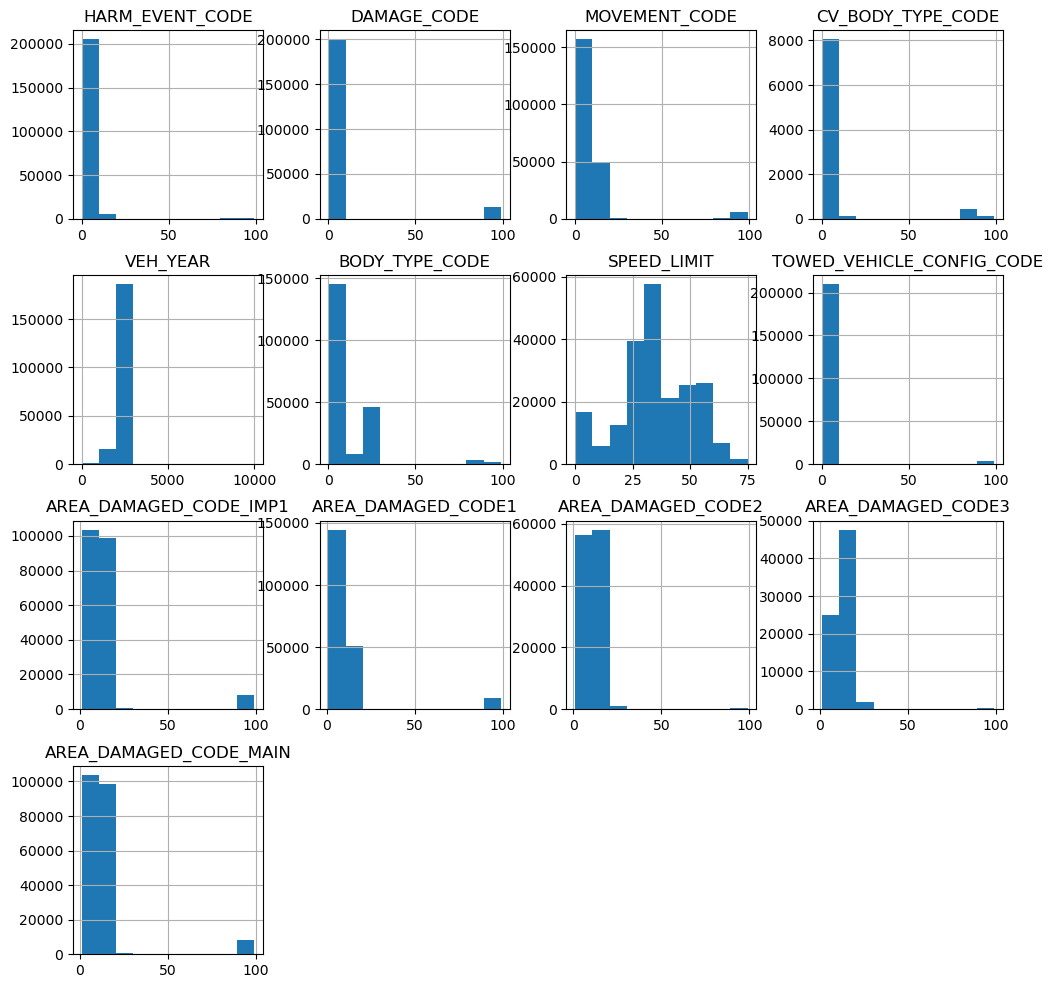

In [66]:
df_vehicle.hist(figsize = [12, 12])
sns.pairplot(df_vehicle)

In [68]:
# value_counts shows the distint values with counts
df_vehicle['VEH_YEAR'].value_counts()

VEH_YEAR
2016.0    14383
2015.0    14289
2013.0    13734
2014.0    13457
2012.0    12253
          ...  
1945.0        1
1959.0        1
313.0         1
1196.0        1
2441.0        1
Name: count, Length: 169, dtype: int64

In [73]:
# veh_year >2017
df_vehicle[df_vehicle['VEH_YEAR'] == 0]

,HARM_EVENT_CODE,CONTI_DIRECTION_CODE,DAMAGE_CODE,MOVEMENT_CODE,REPORT_NO,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,COMMERCIAL_FLAG,VEH_MODEL,...,SPEED_LIMIT,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN
305,0.0,E,99,13.0,DA3413000N,NaN,0.0,XX,N,XX,...,35,Y,NaN,01760c9c-6211-4567-a43c-101c0ebc37e0,0,11.0,11.0,NaN,NaN,11.0
512,1.0,U,99,99.0,AE5774001F,NaN,0.0,UU,N,UU,...,5,Y,NaN,02a4d25c-d362-4552-98c6-b0b46b912fde,0,99.0,99.0,NaN,NaN,99.0
642,0.0,N,99,1.0,ADJ595002G,NaN,0.0,HONDA,N,ODYSSEY,...,25,Y,NaN,034c2fcd-5e4b-471f-a0bb-95a98dc08eee,0,2.0,99.0,NaN,NaN,2.0
1026,0.0,E,99,1.0,AE5963000D,NaN,0.0,UU,N,UU,...,25,Y,NaN,0562fadf-d7b9-4391-b056-25c39395f2a8,0,1.0,1.0,NaN,NaN,1.0
1136,1.0,NaN,99,10.0,ADJ553001T,NaN,0.0,UNK,N,UNK,...,25,N,NaN,06083d97-876d-4215-9f48-b14efc53c78b,0,6.0,6.0,12.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212033,1.0,N,2,3.0,AE5556002X,NaN,0.0,TOYOTA,N,COROLLA,...,30,Y,NaN,fc9e6bc3-006c-4532-a58e-5dc9255b26d1,0,12.0,12.0,NaN,NaN,12.0
212123,2.0,E,2,8.0,AE5675002S,NaN,0.0,UU,N,UU,...,25,Y,NaN,fd1f4e9a-0a0c-46a0-a24a-f7c960eb9616,99,10.0,10.0,11.0,NaN,10.0
212257,9.0,E,99,12.0,AE59090021,NaN,0.0,UU,N,UU,...,30,Y,NaN,fdb199fd-64a6-4457-8a76-bf78355eb0e5,0,12.0,1.0,11.0,12.0,12.0
212423,1.0,W,2,3.0,MCP0617001Y,NaN,0.0,XX,N,XX,...,40,Y,NaN,fe59705e-34f4-4451-88dc-3adcf24795e9,0,12.0,12.0,NaN,NaN,12.0


In [71]:
df_vehicle['VEH_YEAR'].value_counts(bins = [-np.inf, 0, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, np.inf], 
                                sort = False, 
                                dropna = True)

(-inf, 0.0]          1041
(0.0, 1950.0]         286
(1950.0, 1960.0]       10
(1960.0, 1970.0]       49
(1970.0, 1980.0]      127
(1980.0, 1990.0]     1005
(1990.0, 2000.0]    19332
(2000.0, 2010.0]    91946
(2010.0, 2020.0]    88508
(2020.0, inf]         202
Name: count, dtype: int64

In [ ]:
# Lets use a data filtering approach to filter out the values that were determined to be dropped.
print(df_data.shape)
df_data = df_data.loc[(df_data['budget'] > 0) &
                      (df_data['revenue'] > 0) &
                      (df_data['runtime'] > 0) &
                      (df_data['runtime'] <= 350)
                     ].reset_index(drop=True)
print(df_data.shape)

In [40]:
df_vehicle_merge = df_vehicle[['REPORT_NO','VEH_MAKE','SPEED_LIMIT']]

In [41]:
df_vehicle_merge['SPEED_LIMIT'].value_counts()

SPEED_LIMIT
25    39407
35    31105
30    26492
55    26080
40    21172
45    13663
50    11676
0     10731
15     9218
65     5953
5      5861
10     5704
20     3181
70     1697
60      840
75       11
Name: count, dtype: int64

In [34]:
df_vehicle_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212791 entries, 0 to 212790
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   REPORT_NO  212791 non-null  object
 1   VEH_MAKE   212764 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [38]:
# create a new dataframe with unique report number and column 'VEH_MAKE' lists all vehicle types involved in the accident
df_vehicle_merge2 =df_vehicle_merge.fillna('').groupby(['REPORT_NO'],dropna=True)['VEH_MAKE'].apply(', '.join).reset_index()

In [42]:
df_vehicle_merge3 = df_vehicle_merge.fillna('').groupby(['REPORT_NO'],dropna=True).agg({'SPEED_LIMIT':'first', 
                             'VEH_MAKE': ', '.join}).reset_index()

In [43]:
df_vehicle_merge3

,REPORT_NO,SPEED_LIMIT,VEH_MAKE
0,AA0033000G,40,"TOYT, CHEV"
1,AA0033000H,40,JEEP
2,AA00400011,40,"FORD, GMC"
3,AA00400012,50,HONDA
4,AA00400015,55,"CHEV, HYUN"
...,...,...,...
113165,ZW02110003,40,"HONDA, CHRYSLER"
113166,ZW02110005,45,MERZ
113167,ZW02110006,40,KIA
113168,ZW02140001,50,HONDA


### Question 2 (15 points)
Use the .info(), .describe(), .hist() and sns.pairplot() functions to explore the data. Comment on any observations and identify any features that may be worth plotting and evaluating in more detail. (Note that the last question requires to develop a visualization).

### Question 3 (15 points)
Clean the data as you seem necessary. For example, evaluate remove null or duplicate values. Note there may be features where it may be appropriate to have values that are null or duplicated values. Document your reasoning.

### Question 4 (15 points)
a. For each county, determine the average speed of accidents involving bicyclists. (Note: Take a look at the Sample Maryland Crash Report. Report provides a map of the codes including those involving other bicyclists.) <br>
b. Sort the list the sorted by average speed.

In [159]:
# create a new dataframe with only report number and speed limit
# Since each accident may involve over two vehicles, but with same speed limit, use groupby function
# to remove duplicated REPORT_NO and pick only one SPEED_LIMIT
# METHOD1
df_report_speedlimit = df_vehicle[['REPORT_NO','VEH_MAKE','MOVEMENT_CODE','SPEED_LIMIT']].fillna('').groupby(['REPORT_NO'],dropna=True).agg({'VEH_MAKE':', '.join,'MOVEMENT_CODE':'first','SPEED_LIMIT':'first'}).reset_index()

In [141]:
# METHOD2
df_report_speedlimit3 = df_vehicle[['REPORT_NO','MOVEMENT_CODE','SPEED_LIMIT']].drop_duplicates(subset=['REPORT_NO']).reset_index(drop=True)

In [160]:
df_report_speedlimit

,REPORT_NO,VEH_MAKE,MOVEMENT_CODE,SPEED_LIMIT
0,AA0033000G,"TOYT, CHEV",1.0,40
1,AA0033000H,JEEP,1.0,40
2,AA00400011,"FORD, GMC",1.0,40
3,AA00400012,HONDA,13.0,50
4,AA00400015,"CHEV, HYUN",4.0,55
...,...,...,...,...
113165,ZW02110003,"HONDA, CHRYSLER",3.0,40
113166,ZW02110005,MERZ,2.0,45
113167,ZW02110006,KIA,3.0,40
113168,ZW02140001,HONDA,1.0,50


In [221]:
# merge the df_report_speedlimit with the df_report, add a new column 'SPEED_LIMIT'
merged_df_report = df_report.merge(df_report_speedlimit, how = 'inner', on = ['REPORT_NO'])

In [225]:
# create a new dataframe of accidents only involved in bicyclists 
# 'HARM_EVENT_CODE1' == 4 select rows of accidents reporting collision with bicyclists
df_bicy = merged_df_report.loc[merged_df_report['HARM_EVENT_CODE1']==4].reset_index()
# 614 accidents involved in bicyclist 

In [226]:
df_bicy['HARM_EVENT_CODE1']

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
609    4.0
610    4.0
611    4.0
612    4.0
613    4.0
Name: HARM_EVENT_CODE1, Length: 614, dtype: float64

In [190]:
# Next I want to use the MOVEMENT_CODE to estimate the vechicle speed
# MOVEMENT_CODE 01 means moving in a constant speed, so I assume the limited speed is the vehicle speed
# MOVEMENT_CODE 03 (slowing or stoping), assuming the speed as 10 mph
# MOVEMENT_CODE 06 (stopped in traffic lane); 10 (parked). The speed for those accidents will be assumed as 0.
# MOVEMENT_CODE 02 (accelerating) and 08 (passing). The speed for those accidents will be speed_limit plus 10 mph.
# MOVEMENT_CODE 04,05,09,11,12,13,14,15,16 (either parking and making turns) will be counted as low speed (15 mph)
# MOVEMENT_CODE 0,88,99,18.07,19.07,20.03 (unknown or other) will be filtered out

In [227]:
filter1 = df_bicy["MOVEMENT_CODE"].isin([3])
filter2 = df_bicy["MOVEMENT_CODE"].isin([6,10])
filter3 = df_bicy["MOVEMENT_CODE"].isin([2,8])
filter4 = df_bicy["MOVEMENT_CODE"].isin([4,5,9,11,12,13,14,15,16,17])
filter5 = df_bicy["MOVEMENT_CODE"].isin([0,88,99,18.07,19.07,20.03])
df_bicy['SPEED_LIMIT'][filter1]=10
df_bicy['SPEED_LIMIT'][filter2]=0
df_bicy['SPEED_LIMIT'][filter3]=df_bicy['SPEED_LIMIT']+10
df_bicy['SPEED_LIMIT'][filter4]=15
df_bicy=df_bicy[filter5 == False].reset_index()

/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/679218698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicy['SPEED_LIMIT'][filter1]=10
/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/679218698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicy['SPEED_LIMIT'][filter2]=0
/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/679218698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [228]:
# For each county, determine the average speed of accidents involving bicyclists.
# Assume the speed limit as the speed when accidents take place
# Sort the list by average speed.
df_speed_county=df_bicy.groupby('COUNTY_NO')['SPEED_LIMIT'].agg(['mean', 'count']).sort_values(by='mean',ascending=True)

In [232]:
df_speed_county

,mean,count
COUNTY_NO,,
20,0.000000,1
4,20.000000,3
15,20.336538,104
2,20.555556,72
24,20.714286,119
9,20.714286,7
21,20.882353,17
3,20.945946,74
16,21.518987,79


### Question 5 (15 points)
a. Determine the total number of crashes per "vehicle make". Sort the results in alphabetical order by vehicle make (e.g. Chevrolet, Ford, Honda, etc.). <br>
b. Determine average age of the car involved in these accidents for each "vehicle make".

In [233]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212791 entries, 0 to 212790
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HARM_EVENT_CODE            212791 non-null  float64
 1   CONTI_DIRECTION_CODE       191495 non-null  object 
 2   DAMAGE_CODE                212791 non-null  int64  
 3   MOVEMENT_CODE              212791 non-null  float64
 4   REPORT_NO                  212791 non-null  object 
 5   CV_BODY_TYPE_CODE          8742 non-null    float64
 6   VEH_YEAR                   202506 non-null  float64
 7   VEH_MAKE                   212764 non-null  object 
 8   COMMERCIAL_FLAG            212791 non-null  object 
 9   VEH_MODEL                  212692 non-null  object 
 10  HZM_NUM                    375 non-null     object 
 11  TOWED_AWAY_FLAG            212791 non-null  object 
 12  GOING_DIRECTION_CODE       191495 non-null  object 
 13  BODY_TYPE_CODE             20

In [257]:
# drop null values in the column 'VEH_MAKE' and remove rows with unknown vehicle type
df_vehicle = df_vehicle.dropna(subset=['VEH_MAKE']).sort_values('VEH_MAKE', ascending=False)
df_vehicle_new=df_vehicle[df_vehicle['VEH_MAKE']!='UNKNOWN']

In [261]:
df_list_veh = df_vehicle_new['VEH_MAKE'].value_counts().rename_axis('VEH_MAKE').to_frame('counts_crash')

In [237]:
# create a new column with car age
df_vehicle['CAR_AGE']=2017-df_vehicle['VEH_YEAR']

/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/1927507749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle['CAR_AGE']=2017-df_vehicle['VEH_YEAR']


In [276]:
df_vehicle['VEH_MODEL'].value_counts()

VEH_MODEL
4S            14709
TK            12206
UNKNOWN       10844
ACCORD         7247
CAMRY          6057
              ...  
SPECTRA 4S        1
TAN               1
OLX               1
ROE               1
ESCAKE            1
Name: count, Length: 8440, dtype: int64

In [267]:
# filter out car age < -1; some of cars may have newest model, such as 2018
# 
df_vehicle_fil = df_vehicle[(df_vehicle['CAR_AGE']>=-1) & (df_vehicle['CAR_AGE']<200)]

In [270]:
# Determine average age of the car involved in these accidents for each "vehicle make".
df_vehicle_fil.groupby('VEH_MAKE')['CAR_AGE'].mean()

VEH_MAKE
\tFRHT        5.0
\tHYUN       13.0
             17.0
 ACUR         7.0
 CHEV         6.0
             ... 
ZHEJIANG     10.0
ZHONGNENG     4.0
ZION          7.0
ZNEN         10.0
ZUMMER        2.0
Name: CAR_AGE, Length: 2612, dtype: float64

### Question 6 (15 points)
a. Determine all the accidents that happened in a circle centered at (39.197753, -77.263303) with a radius of 5 km.<br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour within the 5 km circle. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour within the 5 km circle.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found in the Project1 folder.

In [280]:
merged_df_report.info()

39.643784096384

In [279]:
lat1 = 39.197753
lon1 = -77.263303
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [290]:
# Create a new column that calculates the distance away from the coordinate (39.197753, -77.263303)
merged_df_report["DISTANCE"] = merged_df_report.apply(lambda x: haversine_distance(lat1,lon1,x["LATITUDE"], x["LONGITUDE"]), axis=1)

In [291]:
# Select distance <= 5 km
df_accidents_circle_5km = merged_df_report[merged_df_report['DISTANCE']<=5].reset_index()

In [293]:
df_accidents_circle_5km.shape # 1164 accidents happened in a circle centered at (39.197753, -77.263303) with a radius of 5 km

(1164, 41)

In [296]:
 # Determine the number of accidents where the speed limit was above 51 miles per hour within the 5 km circle.
df_accidents_circle_5km[df_accidents_circle_5km['SPEED_LIMIT']>=51].shape

(145, 41)

In [297]:
#Determine the number of accidents where the speed limit was below 41 miles per hour within the 5 km circle.
df_accidents_circle_5km[df_accidents_circle_5km['SPEED_LIMIT']<=41].shape

(885, 41)

### Question 7 (15 points)

Determine the number of drivers, who got in a car crash, from non-DMV states and list them by total drivers, female and male. Consollidate the final values in one dataframe. <br>
`St | Drivers | Female | Male ` <br>
`NY | 151034  | 101000 | 50034` <br>
`PA | 125131  | 105000 | 20131` <br>
...


b. Use the states drivers data from the states_drivers.csv to normalize the previous list with number of total drivers for each state. For example, there are 12 million drivers in NY, then the normalized numbers should be:
<br>
`St |  Drivers  | Normalized` <br>
`NY |  151034   | 1.26E-5   ` <br>
`PA |  125131   |....       ` <br>
...

In [301]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261679 entries, 0 to 261678
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SEX_CODE               243901 non-null  object        
 1   CONDITION_CODE         197627 non-null  float64       
 2   INJ_SEVER_CODE         261679 non-null  int64         
 3   REPORT_NO              261679 non-null  object        
 4   OCC_SEAT_POS_CODE      63365 non-null   float64       
 5   PED_VISIBLE_CODE       4929 non-null    float64       
 6   PED_LOCATION_CODE      4929 non-null    float64       
 7   PED_OBEY_CODE          4929 non-null    float64       
 8   PED_TYPE_CODE          4929 non-null    float64       
 9   MOVEMENT_CODE          4929 non-null    float64       
 10  PERSON_TYPE            261679 non-null  object        
 11  ALCOHOL_TEST_CODE      198314 non-null  float64       
 12  ALCOHOL_TESTTYPE_CODE  4914 non-null    floa

In [376]:
# remove rows with null values in the column 'LICENSE_STATE_CODE','SEX_CODE'
# filter drivers from non-DMV states and unidentified category 'XX'
df_person = df_person.dropna(subset=['LICENSE_STATE_CODE','SEX_CODE'])
filter_state = df_person["LICENSE_STATE_CODE"].isin(['MD','VA','DC','XX'])
df_person_nonDMV=df_person[~filter_state].reset_index()

In [377]:
#Determine the number of drivers, who got in a car crash, from non-DMV states and 
#list them by total drivers, female and male. Consollidate the final values in one dataframe.
df_drivers_FM=df_person_nonDMV.groupby(['LICENSE_STATE_CODE','SEX_CODE']).size().unstack(['SEX_CODE']).reset_index()

In [378]:
df_drivers_FM['DRIVERS']=df_drivers_FM['F']+df_drivers_FM['M'] # only count the total number of male and female drivers

In [379]:
# change column names
df_drivers_FM = df_drivers_FM.rename(columns={'LICENSE_STATE_CODE':'STATE','F': 'Female', 'M': 'Male','U':'Unidentified'}).rename_axis(columns=None)

In [385]:
df_drivers_FM=df_drivers_FM.dropna(subset=['DRIVERS'])
df_drivers_FM=df_drivers_FM.drop('Unidentified',axis=1)

In [397]:
# Use the states drivers data from the states_drivers.csv to normalize the previous list 
# with number of total drivers for each state.
df_state_driver = pd.read_csv('states_drivers.csv',thousands=',') # it's important to perform the arg of thousands, otherwise the df will take numbers as strings

In [399]:
df_state_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   51 non-null     object
 1   MALE    51 non-null     int64 
 2   FEMALE  51 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [400]:
df_state_driver['TOTAL']=df_state_driver['MALE']+df_state_driver['FEMALE']

In [401]:
# create a dictionary that convert state names to abbreviations
# use strip function to remove any white space in the 'STATE' column
# then use df.map to convert the values in 'STATE' column
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "Dist. of Col.": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df_state_driver['STATE']=df_state_driver['STATE'].str.strip()
df_state_driver['STATE']=df_state_driver['STATE'].map(us_state_to_abbrev)

In [402]:
merged_df_driver = df_drivers_FM.merge(df_state_driver, how = 'inner', on = ['STATE'])

In [403]:
merged_df_driver

,STATE,Female,Male,DRIVERS,MALE,FEMALE,TOTAL
0,AK,12.0,18.0,30.0,251993,281234,533227
1,AL,23.0,74.0,97.0,1896942,2010096,3907038
2,AR,15.0,23.0,38.0,1041548,1078030,2119578
3,AZ,42.0,70.0,112.0,2502985,2475777,4978762
4,CA,157.0,215.0,372.0,12968614,12564306,25532920
5,CO,32.0,55.0,87.0,2037265,1937256,3974521
6,CT,59.0,99.0,158.0,1267221,1299452,2566673
7,DE,679.0,1133.0,1812.0,360931,381593,742524
8,FL,392.0,737.0,1129.0,6988162,7274553,14262715
9,GA,142.0,245.0,387.0,3292710,3613481,6906191


In [404]:
merged_df_driver['Normalized']=merged_df_driver['DRIVERS']/merged_df_driver['TOTAL']

In [416]:
merged_df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       48 non-null     object 
 1   Female      48 non-null     float64
 2   Male        48 non-null     float64
 3   DRIVERS     48 non-null     float64
 4   MALE        48 non-null     int64  
 5   FEMALE      48 non-null     int64  
 6   TOTAL       48 non-null     int64  
 7   Normalized  48 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.1+ KB


### Question 8 (15 points)
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?

In [411]:
# create a new column 'WEEKDAY' that describes when accident happended (Monday to Sunday; 0-6)
import datetime
df_report['WEEKDAY'] = df_report['ACC_DATE'].apply(lambda x: x.weekday())

In [421]:
df_report['WEEKDAY'].value_counts() # Fridays have the most crashes happen, which is 17957

WEEKDAY
4    17957
3    16750
1    16489
2    16299
5    16172
0    15756
6    13769
Name: count, dtype: int64

In [432]:
# On which hour of the day (00 - 24) do the most of the crashes happen?
# convert the ACC_TIME column to time stamp style
df_report['ACC_TIME']=pd.to_datetime(df_report['ACC_TIME'].astype(str))

/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/126141873.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_report['ACC_TIME']=pd.to_datetime(df_report['ACC_TIME'].astype(str))


In [455]:
df_report["DATE"] = df_report["ACC_DATE"].dt.date
df_report['NEWTIME']=df_report['ACC_TIME'].dt.time

In [466]:
df_report['misc']=df_report['DATE'].astype(str) +' '+ df_report['NEWTIME'].astype(str)

In [ ]:
pd.to_datetime(df_report['misc'])
df_report['misc'].dt.year.value_counts() # change year to time

In [439]:
df_report['time_hour'] = pd.to_datetime(df_report['ACC_TIME']).dt.hour

In [445]:
df_report['time_hour'].value_counts().sort_values()# Accidents happen most frequently at around 5 pm

time_hour
4     1513
3     1684
5     1884
2     2260
1     2337
0     2865
23    3191
6     3271
22    3588
21    4062
20    4336
10    4847
7     4912
9     5145
11    5252
19    5279
8     5898
13    5991
12    6150
14    6891
18    7135
15    7996
16    8228
17    8477
Name: count, dtype: int64

### Question 9 (15 points)
a. What is the number of accidents that happened on rainy and clear/cloudy days?
b. What is the ration of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days? 
c. Calculate the number of fatal accidents that occur by each light condition.

What does these statistics tell us?

In [512]:
# The values in the WEATHER_CODE column is pretty messy as it contains both floats and integers.
# For the integers, let's assume they are correct, such as code 3 (representing rainy days)
# For the floats, such as 6.01 and 7.01, there are no rows with weather code 1 (clear/cloudy), which doesn't make sense
# so I assume the floats are a combination of other category code and weather code.
# Let's replace the float values with the codes after the decimal point
df_report['WEATHER_CODE'][df_report['WEATHER_CODE'] == 6.01] = 1
df_report['WEATHER_CODE'][df_report['WEATHER_CODE'] == 7.01] = 1

/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/801282364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_report['WEATHER_CODE'][df_report['WEATHER_CODE'] == 6.01] = 1
/var/folders/60/9pvfh2x50b98gzts0rd2kxkwr16vdt/T/ipykernel_9092/801282364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_report['WEATHER_CODE'][df_report['WEATHER_CODE'] == 7.01] = 1


In [514]:
df_report['WEATHER_CODE'].value_counts()[3]

13791

In [519]:
ratio_rain=df_report['WEATHER_CODE'].value_counts()[3]/df_report['WEATHER_CODE'].value_counts()[1]

In [535]:
print(f'The number of accidents that happened on rainy days is :{df_report.WEATHER_CODE.value_counts()[3]}. \nThe number of accidents that happened on clear/cloudy days is :{df_report.WEATHER_CODE.value_counts()[1]}')

The number of accidents that happened on rainy days is :13791. 
The number of accidents that happened on clear/cloudy days is :81915


In [536]:
print(f'The ratio of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days is : {ratio_rain}')

The ratio of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days is : 0.16835744369163158


In [513]:
df_report['WEATHER_CODE'].value_counts()
# 01: clear/cloudy
# 02: foggy
# 03: raniny

WEATHER_CODE
1.00     81915
3.00     13791
0.00     13347
8.04      1470
99.00      946
2.00       686
12.04      329
88.00      317
9.04       148
5.00       145
10.04       96
11.88        2
Name: count, dtype: int64

In [508]:
df_report.iloc[19]

LIGHT_CODE                               1.0
COUNTY_NO                                  3
MUNI_CODE                                NaN
JUNCTION_CODE                            NaN
COLLISION_TYPE_CODE                       88
SURF_COND_CODE                           NaN
LANE_CODE                                NaN
RD_COND_CODE                             NaN
RD_DIV_CODE                              NaN
FIX_OBJ_CODE                             0.0
REPORT_NO                         AE5735001V
REPORT_TYPE            Property Damage Crash
WEATHER_CODE                            6.01
ACC_DATE                 2017-03-06 00:00:00
ACC_TIME                            14:30:00
LOC_CODE                                 NaN
SIGNAL_FLAG                                N
C_M_ZONE_FLAG                              N
AGENCY_CODE                           BACOPD
AREA_CODE                                UNK
HARM_EVENT_CODE1                         2.0
HARM_EVENT_CODE2                         0.0
RTE_NO    

In [474]:
# Calculate the number of fatal accidents that occur by each light condition
df_person['INJ_SEVER_CODE'].value_counts() # code 5 represents the fatal accidents
df_fatal=df_person[df_person['INJ_SEVER_CODE']==5]

In [480]:
reportlist=df_fatal['REPORT_NO'].tolist()

In [483]:
df_fatal=df_report.loc[df_report['REPORT_NO'].isin(reportlist)].reset_index() 

In [486]:
df_fatal['LIGHT_CODE'].value_counts()

LIGHT_CODE
1.00    162
3.00     88
4.00     87
5.02     10
6.02     10
7.88      7
0.00      1
Name: count, dtype: int64

### Question 10 (10 points)
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

# NOTEBOOK END